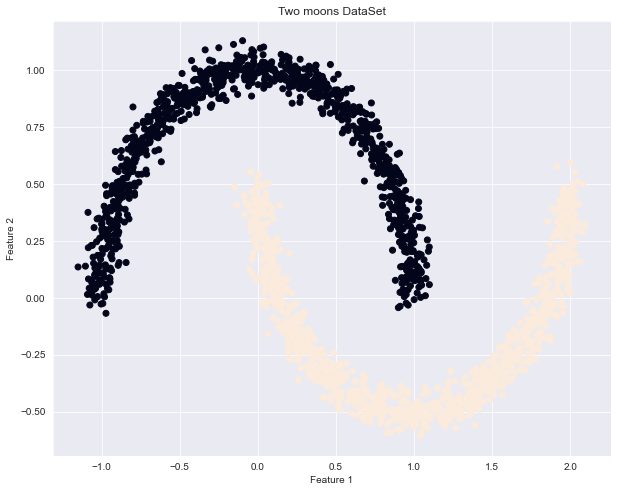

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate the data
dataset1_X, dataset1_y = make_moons(n_samples=2000, noise=0.05, random_state=0)

# Plot the data
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()

In [10]:
def data_generator():
  n = 1000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))
  return X,y


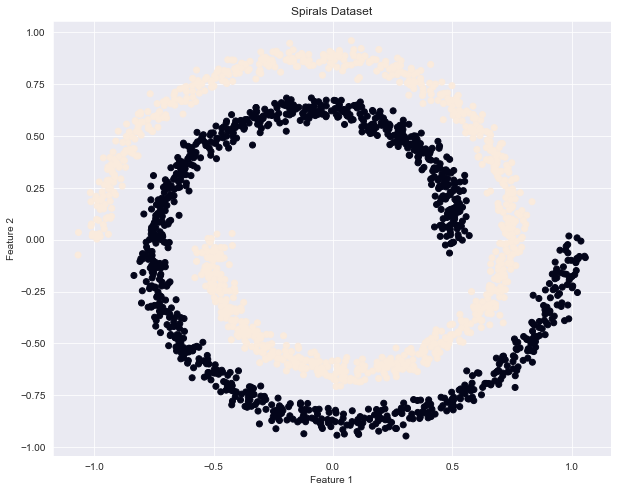

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(13)

Dataset2_X, Dataset2_y = data_generator()


plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=Dataset2_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset')
plt.show()


In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns 
import math
sns.set_style("darkgrid")

# Shuffle Both Dataset
np.random.shuffle(Dataset2_X)
np.random.shuffle(dataset1_X)

# Select 500 Sample
init_samples_1 =  dataset1_X[:750,:]
init_samples_2 =  Dataset2_X[:750,:]

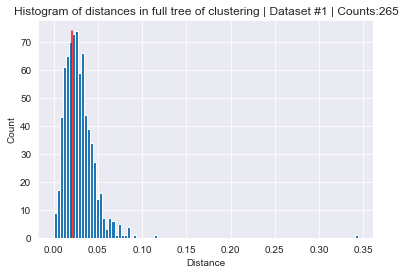

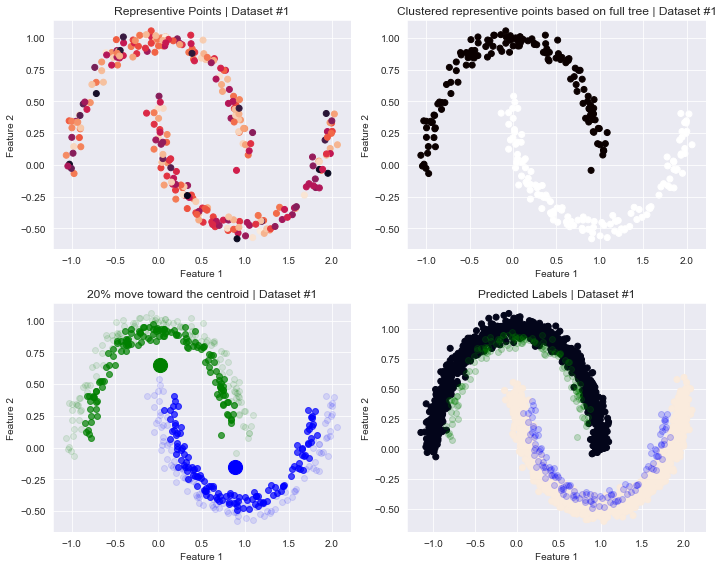

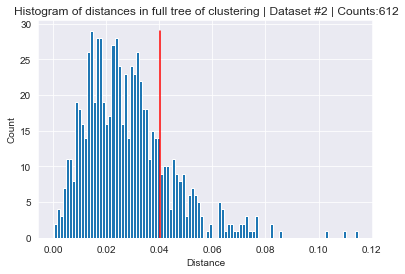

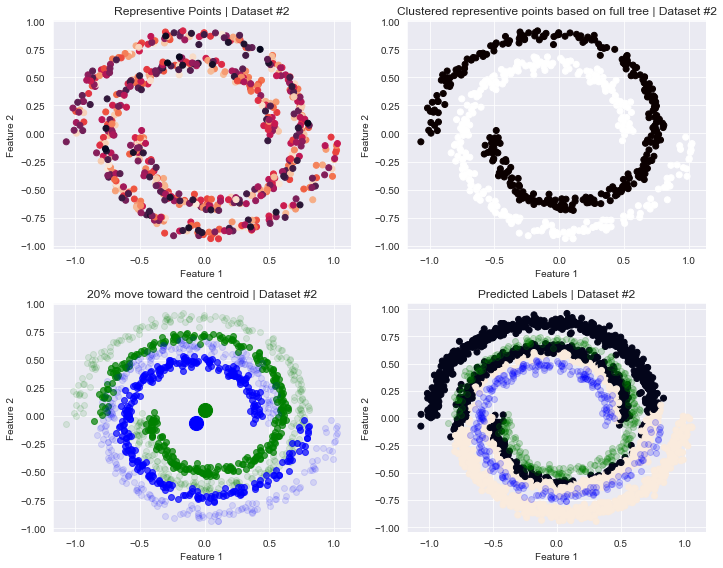

In [13]:
def generate_results(name,init_samples_1,dataset1_X):
    clustering_model = AgglomerativeClustering(linkage="single",distance_threshold=0, n_clusters=None)
    clustering_model.fit(init_samples_1)

    ratio = 0.3
    if "2" in name:
        ratio = 0.8
        
    plt.rcParams["figure.figsize"] = (6,4)
    count_treshold = int(init_samples_1.shape[0] * ratio)
    counts,distances,_ = plt.hist(clustering_model.distances_,bins=100)
    index = 0
    while sum(counts[:index]) < count_treshold:
        index += 1 


    Thresh = distances[index]
    Indexes = np.where(clustering_model.distances_<Thresh)
    representive_points = init_samples_1[Indexes, :][0]
    plt.plot([Thresh,Thresh],[0,max(counts)],color="red")
    plt.title("Histogram of distances in full tree of clustering | "+name+" | Counts:"+str(len(representive_points)))
    plt.ylabel("Count")
    plt.xlabel("Distance")
    plt.show()

    plt.rcParams["figure.figsize"] = (10,8)
    W,H,I = 2,2,1
    plt.subplot(W,H,I)
    I+=1
    plt.scatter(representive_points[:,0], representive_points[:,1], c=clustering_model.labels_[:len(representive_points)])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Representive Points | '+name)
    plt.subplot(W,H,I)
    I+=1


    clustering_model = AgglomerativeClustering(linkage="single",n_clusters=2)
    clustering_model.fit(representive_points)
    labels = clustering_model.labels_
    plt.scatter(representive_points[:,0], representive_points[:,1], c=labels,cmap="hot")

    c0 = representive_points[labels==0]
    c1 = representive_points[labels==1]
    mean0 = np.mean(c0,axis=0)
    mean1 = np.mean(c1,axis=0)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clustered representive points based on full tree | '+name)
    plt.subplot(W,H,I)
    I+=1

    c0_new = c0.copy()
    c1_new = c1.copy()

    for i in range(c0.shape[0]):
        c0_new[i] += (mean0 - c0_new[i])*0.2
    for i in range(c1.shape[0]):
        c1_new[i] += (mean1 - c1_new[i])*0.2

    plt.scatter(c0_new[:,0], c0_new[:,1],color="green",alpha=0.7)
    plt.scatter(c0[:,0], c0[:,1],color="green",alpha=0.1)
    plt.scatter([mean0[0]],[mean0[1]],color="green",s=200)

    plt.scatter(c1_new[:,0], c1_new[:,1],color="blue",alpha=0.7)
    plt.scatter(c1[:,0], c1[:,1],color="blue",alpha=0.1)
    plt.scatter([mean1[0]],[mean1[1]],color="blue",s=200)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('20% move toward the centroid | '+name)
    plt.subplot(W,H,I)
    I+=1

    predicted_labels = []
    for i in range(dataset1_X.shape[0]):
        _0_distances = []
        for j in range(c0_new.shape[0]):
            _0_distances.append(math.dist(dataset1_X[i,:],c0_new[j,:]))
        _dis0 = np.min(_0_distances)
        
        _1_distances = []
        for j in range(c1_new.shape[0]):
            _1_distances.append(math.dist(dataset1_X[i,:],c1_new[j,:]))
        _dis1 = np.min(_1_distances)
        
        if _dis0 < _dis1:
            predicted_labels.append(0)
        else:
            predicted_labels.append(1)
        if _dis0 == _dis1:
            print("* Equal")

    plt.scatter(dataset1_X[:,0], dataset1_X[:,1], c=predicted_labels)
    plt.scatter(c1_new[:,0], c1_new[:,1],color="blue",alpha=0.2)
    plt.scatter(c0_new[:,0], c0_new[:,1],color="green",alpha=0.2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Predicted Labels | '+name)
    plt.tight_layout()
    plt.show()
    
generate_results("Dataset #1",init_samples_1,dataset1_X)
generate_results("Dataset #2",init_samples_2,Dataset2_X)